In [1]:
import numpy as np

rng = np.random.default_rng(42)

from chess2vec import load_prepared
import gzip
from pca import idxarr_tocsc, eigfix, covariance
from scipy.linalg import eigh
from utils import show_matrices, normalize_minmax

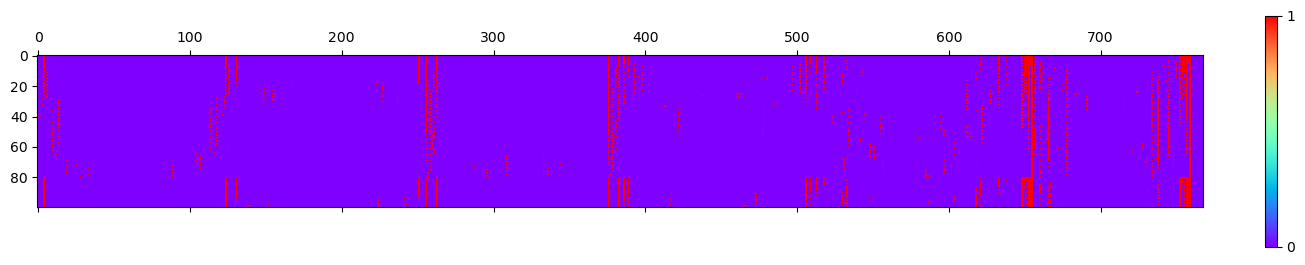

In [2]:
with gzip.open("data/bin/lichess_elite_2024-04_indices", "rt") as f:
    demo = load_prepared(f, count=100)

demo_mat = idxarr_tocsc(demo, 768).todense()
show_matrices([demo_mat], cmaps=["rainbow"], figsize=(16, 3), fraction=0.01)

In [ ]:
with gzip.open("data/bin/lichess_elite_2024-04_indices", "rt") as f:
    mat = load_prepared(f, count=1_000_000)

C = covariance(mat, cols=768)

np.save(f"data/C{len(mat)//1000}k.npy", C)

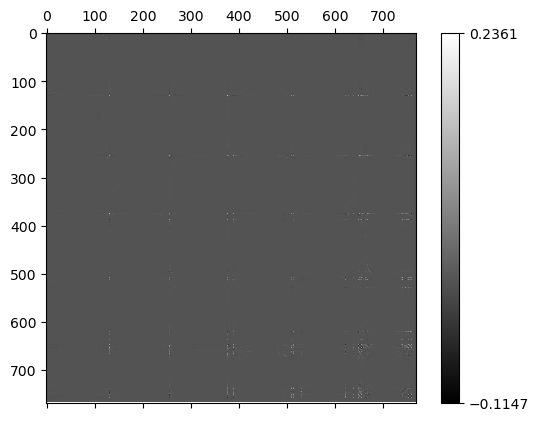

In [3]:
C = np.load("data/C1000k.npy")

show_matrices([C], ["binary_r"], fraction=0.04)

In [3]:
w, v = eigfix(*eigh(C))

P = v[:, :256]

np.save("data/P1000k-256.npy", P)

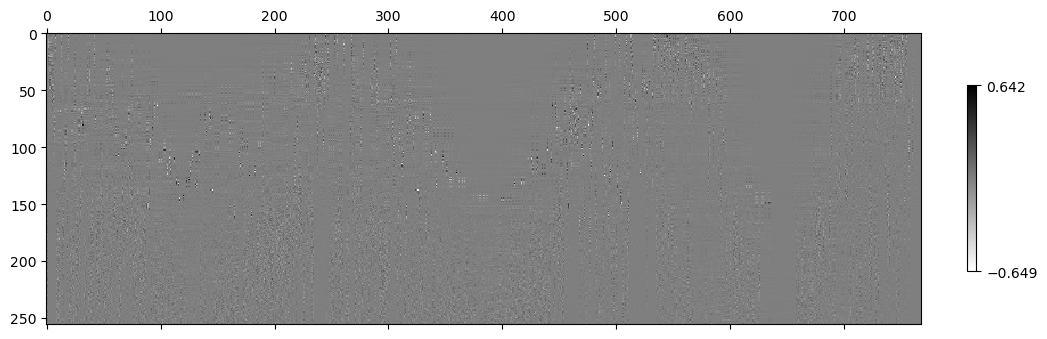

In [4]:
P = np.load("data/P1000k-256.npy")

show_matrices([P.T], ["binary"], figsize=(12, 4), fraction=0.01)

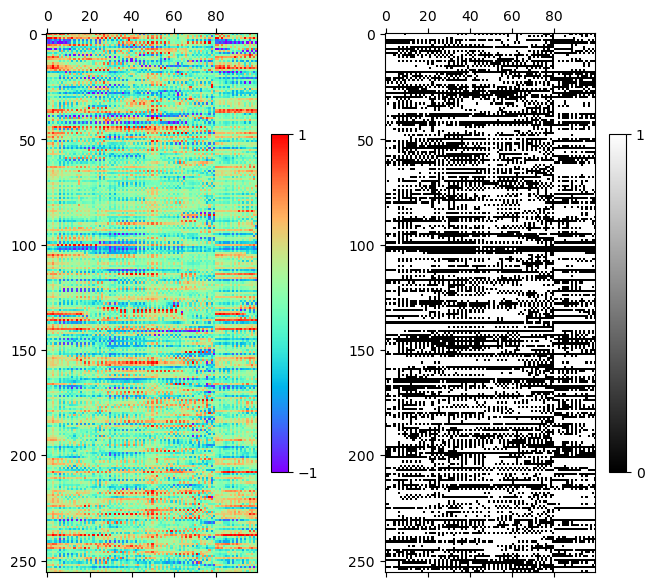

In [5]:
V = normalize_minmax(demo_mat @ P)
B = V >= 0

show_matrices([V.T, B.T], ["rainbow", "binary_r"], 1, 2, fraction=0.06, figsize=(8, 7))